# Week1授業前課題1 Pythonを使ってみよう

1枚の紙を43回折り曲げた時の厚さを計算するプログラム を作成する。  
43回折った紙の厚さ$ t_{43} $は、折る前の紙の厚さ$ t_0 $を使い以下の数式で求まる。  
  
$$
t_{43} = t_0 * 2^{43}
$$
  
折る前の紙の厚さ$ t_0 $は$ 0.00008m $とする。  

## 【問題1】べき乗の算術演算子を使用して作成

べき乗の算術演算子を使用したプログラムを作る。

In [64]:
# coding utf8
#
# べき乗の算術演算子を使用して作成

"""
紙を43回折った時の厚さを計算するコード
"""
import time
start = time.time()


# 変数の定義
# 紙の厚さ
thickness = 0.00008
# 折る回数
fold_times = 43

# 厚さの計算
folded_thickness = thickness * 2 ** fold_times

print("厚さ： {:.2f}メートル".format(folded_thickness))
elapsed_time_pow = time.time() - start
print("time : {}[s]".format(elapsed_time_pow))

厚さ： 703687441.78メートル
time : 0.00013899803161621094[s]


## 【問題2】単位の変換
単位がメートルだと実感が湧きづらいので、◯◯万キロメートル に変換して表示させる。

In [34]:
# メートルをキロメートルに変換して小数点以下2桁で表示する
print("厚さ： {:.2f}万キロメートル".format(folded_thickness / (1000*10000)))

厚さ： 70.37万キロメートル


月までの距離は約38万キロメートルであるから、紙を43回折ると月まで届く計算となる。

## 【問題3】for文を使用して作成
for文を使用したプログラムを作る。  
べき乗の算術演算子は使ってはならない。算術演算子は**四則演算（+、-、*、/）のみ使える**。

In [75]:
# べき乗の計算をループで実行
import time
start = time.time()

thickness = 0.00008
fold_times = 43


#  folded_thickness = thickness*2^(fold_times)
#  2^(fold_times )の箇所をループで行う
# n = 2^(fold_times )
# ループを２の累乗としたのは、ループの中ので扱う数値をシンプルにしたかったためである
# float型は表現誤差が生じる可能性があり、ループの中で扱いたくない
# 一方、２の累乗はデータ型がint型であるし、ビット演算にも置き換えられる
n = 1 # n^0 = 1
for i in range(fold_times):
    # n = n * 2
    n *= 2

#  folded_thickness = thickness*2^(fold_times) = thickness * n 
folded_thickness_2pow = thickness * n 

# メートルを万キロメートルに変換して小数点以下2桁で表示する
print("厚さ： {:.2f}万キロメートル".format(folded_thickness_2pow / (1000*10000)))

# 計算時間
elapsed_time_for = time.time() - start
print("time : {}[s]".format(elapsed_time_for))

厚さ： 70.37万キロメートル
time : 0.0001857280731201172[s]


### 【おまけ】ループ内で紙の厚さを２倍にしていく
ループ内で２倍にしていく値を２ではなく、thikness(0.00008)にする。
誤差が生じるか確認する。

In [83]:
# べき乗の計算をループで実行
import time
start = time.time()

thickness = 0.00008
fold_times = 43

#  folded_thickness = thickness*2^(fold_times)
for i in range(fold_times):
    thickness *= 2

#  folded_thickness = thickness*2^(fold_times) = thickness * n 
folded_thickness_thick = thickness

# メートルを万キロメートルに変換して小数点以下2桁で表示する
print("厚さ： {:.2f}万キロメートル".format(folded_thickness_thick / (1000*10000)))

# 計算時間
elapsed_time_for = time.time() - start
print("time : {}[s]".format(elapsed_time_for))

厚さ： 70.37万キロメートル
time : 0.00015997886657714844[s]


計算結果を比較する。

In [84]:
from decimal import *

print("べき乗演算子を用いた場合：{}".format(Decimal(folded_thickness)))
print("ループで２を累乗した場合：{}".format(Decimal(folded_thickness_2pow)))
print("ループで紙の厚さを２倍していった場合：{}".format(Decimal(folded_thickness_thick)))

べき乗演算子を用いた場合：703687441.77664005756378173828125
ループで２を累乗した場合：703687441.77664005756378173828125
ループで紙の厚さを２倍していった場合：703687441.77664005756378173828125


今回の計算では、計算結果は変わらない。  
float型による誤差は生じていないようである。  

### 【おまけ】ビット演算
Pythonでビット演算を行う場合、この方法が正しいのかはわからないが試しに行ってみた。  
結果は、この方法によるビット演算の方が劇的に速いということはないようである。  
for文を用いた場合よりは速く、べき乗の演算子を用いた場合と同じか、もしくは遅いこともあるようである。  

In [61]:
# おまけ　べき乗の計算をビット演算で行う
import time
start = time.time()

thickness = 0.00008
fold_times = 43

# 折る回数だけ左にシフトする
# bin(x)はxを２進数の文字列に変換する
# "<<"演算子で左にシフトする
folded_thickness = thickness * int(bin(1 << fold_times ), 0)

# メートルをキロメートルに変換して小数点以下2桁で表示する
print("厚さ： {:.2f}万キロメートル".format(folded_thickness / (1000*10000)))
# 計算時間
elapsed_time = time.time() - start
print("time : {}[s]".format(elapsed_time))

厚さ： 70.37万キロメートル
厚さ： 703687441.78メートル
time : 0.0003190040588378906[s]


## 【問題4】計算時間の比較
2つの方法の計算時間を出力する。それぞれの計算時間の関係を簡単に説明する。

In [55]:
from decimal import Decimal

print("べき乗の演算子を用いた場合…time : {}[s]".format(elapsed_time_pow))
print("for文を用いた場合…time : {}[s]".format(elapsed_time_for))

if elapsed_time_pow < elapsed_time_for:
    print("べき乗の演算子を用いた場合の方が {}秒処理が速かった。".format(Decimal(Decimal(elapsed_time_for) - Decimal(elapsed_time_pow))))
    print("倍率に換算すると約{:.2f}倍となる。".format(Decimal(Decimal(elapsed_time_for) / Decimal(elapsed_time_pow))))
elif elapsed_time_pow > elapsed_time_for:
    print("for文を用いた場合の方が {}秒処理が速かった。".format(Decimal(Decimal(elapsed_time_pow) - Decimal(elapsed_time_for))))
    print("倍率に換算すると約{:.2f}倍となる。".format(Decimal(Decimal(elapsed_time_pow) / Decimal(elapsed_time_for))))
elif elapsed_time_pow == elapsed_time_for:
    print("処理速度は等しかった。")
else:
    print("想定外")
print("ただし、結果は試行の度に異なる。")

べき乗の演算子を用いた場合…time : 0.00011587142944335938[s]
for文を用いた場合…time : 0.0003631114959716797[s]
べき乗の演算子を用いた場合の方が 0.0002472400665283203125秒処理が速かった。
倍率に換算すると約3.13倍となる。
ただし、結果は試行の度に異なる。


### 計算時間の関係についての考察

上記の計算では、べき乗の演算子を用いても、for文を用いても計算時間に大きな差はないようである。結果は試行の度に変わるが、べき乗演算子を用いた場合の方が僅差で計算時間が短い。しかし、倍率で考えると差が生じる。  
今回のような計算量が小さい場合はどちらを用いても問題ないであろうが、より計算量の大きい処理ではべき乗演算子を用いた方が良いようである。  

## 過程の可視化
折り曲げた時の厚さを毎回記録しておき、それを折れ線グラフで可視化する。  
数式を一般化し、n回折った紙の厚さ$ t_n $は以下のように表せる。  
  
$$
t_n = t_0 * 2^n
$$
  
これは指数関数である。指数関数は値が急激に増加する性質がある。厚さが急激に増えて月に到達する様子をグラフで見てみる。

## 【問題5】リストへの保存
ここまでは43回折った後の最後の値だけを使用していましたが、グラフで可視化するためには過程の値も必要である。for文を使用したコードに、過程の値合計44個を記録するコードを加える。  
最終的にリストに44個の値が格納されていることをlen関数を用いて確認しておく。

In [85]:
# 計算過程をリストに保存する

thickness = 0.00008
fold_times = 43

# 空のリストを作成
y_list = []

# 0回折った紙の厚＝元の紙の厚さ
folded_thickness = thickness
# 折る前の値をリストに追加
y_list.append(folded_thickness)

for i in range(fold_times):
    folded_thickness *= 2
    y_list.append(folded_thickness)

print("リストに格納されている値の数：{}個".format(len(y_list)))
print("リストに格納されている値:")

for x,y in enumerate(y_list):
    print("ループ回数:{0}  値:{1}".format(x,y))

リストに保存されている値の数：44個
リストに保存されている値:
ループ回数:0  値:8e-05
ループ回数:1  値:0.00016
ループ回数:2  値:0.00032
ループ回数:3  値:0.00064
ループ回数:4  値:0.00128
ループ回数:5  値:0.00256
ループ回数:6  値:0.00512
ループ回数:7  値:0.01024
ループ回数:8  値:0.02048
ループ回数:9  値:0.04096
ループ回数:10  値:0.08192
ループ回数:11  値:0.16384
ループ回数:12  値:0.32768
ループ回数:13  値:0.65536
ループ回数:14  値:1.31072
ループ回数:15  値:2.62144
ループ回数:16  値:5.24288
ループ回数:17  値:10.48576
ループ回数:18  値:20.97152
ループ回数:19  値:41.94304
ループ回数:20  値:83.88608
ループ回数:21  値:167.77216
ループ回数:22  値:335.54432
ループ回数:23  値:671.08864
ループ回数:24  値:1342.17728
ループ回数:25  値:2684.35456
ループ回数:26  値:5368.70912
ループ回数:27  値:10737.41824
ループ回数:28  値:21474.83648
ループ回数:29  値:42949.67296
ループ回数:30  値:85899.34592
ループ回数:31  値:171798.69184
ループ回数:32  値:343597.38368
ループ回数:33  値:687194.76736
ループ回数:34  値:1374389.53472
ループ回数:35  値:2748779.06944
ループ回数:36  値:5497558.13888
ループ回数:37  値:10995116.27776
ループ回数:38  値:21990232.55552
ループ回数:39  値:43980465.11104
ループ回数:40  値:87960930.22208
ループ回数:41  値:175921860.44416
ループ回数:42  値:351843720.88832
ループ回数:4

### 【おまけ】リスト内包表記を用いた場合
> [式 for 変数名 in イテラブルオブジェクト]  

こちらの方が少ないコードで書けるが、慣れるまではfor文の方が理解しやすいかも知れない。

In [109]:
# 計算過程をリストに保存する

thickness = 0.00008
fold_times = 43

# 0回目の折った値（折る前の値）も計算して格納する関係で、折る回数に１を足した回数だけループする
y_list = [thickness*2**n for n in range(fold_times + 1)]

print("リストに格納されている値の数：{}個".format(len(y_list)))
print("リストに格納されている値:")

for x,y in enumerate(y_list):
    print("ループ回数:{0}  値:{1}".format(x,y))

リストに格納されている値の数：44個
リストに格納されている値:
ループ回数:0  値:8e-05
ループ回数:1  値:0.00016
ループ回数:2  値:0.00032
ループ回数:3  値:0.00064
ループ回数:4  値:0.00128
ループ回数:5  値:0.00256
ループ回数:6  値:0.00512
ループ回数:7  値:0.01024
ループ回数:8  値:0.02048
ループ回数:9  値:0.04096
ループ回数:10  値:0.08192
ループ回数:11  値:0.16384
ループ回数:12  値:0.32768
ループ回数:13  値:0.65536
ループ回数:14  値:1.31072
ループ回数:15  値:2.62144
ループ回数:16  値:5.24288
ループ回数:17  値:10.48576
ループ回数:18  値:20.97152
ループ回数:19  値:41.94304
ループ回数:20  値:83.88608
ループ回数:21  値:167.77216
ループ回数:22  値:335.54432
ループ回数:23  値:671.08864
ループ回数:24  値:1342.17728
ループ回数:25  値:2684.35456
ループ回数:26  値:5368.70912
ループ回数:27  値:10737.41824
ループ回数:28  値:21474.83648
ループ回数:29  値:42949.67296
ループ回数:30  値:85899.34592
ループ回数:31  値:171798.69184
ループ回数:32  値:343597.38368
ループ回数:33  値:687194.76736
ループ回数:34  値:1374389.53472
ループ回数:35  値:2748779.06944
ループ回数:36  値:5497558.13888
ループ回数:37  値:10995116.27776
ループ回数:38  値:21990232.55552
ループ回数:39  値:43980465.11104
ループ回数:40  値:87960930.22208
ループ回数:41  値:175921860.44416
ループ回数:42  値:351843720.88832
ループ回数:4

## 【問題6】折れ線グラフの表示
グラフの描画にはMatplotlibというライブラリを用いる。  
グラフを表示させた場合はそれに対する考察が重要である。厚さがどのように変化しているかを簡単に説明する。  

1回目のグラフ


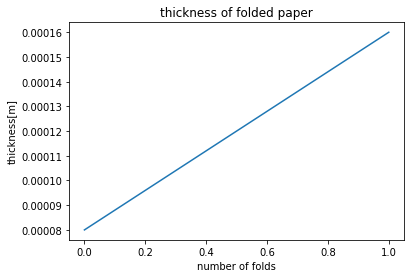

厚さ： 0.00016メートル
----------------------------------------------------------------------
2回目のグラフ


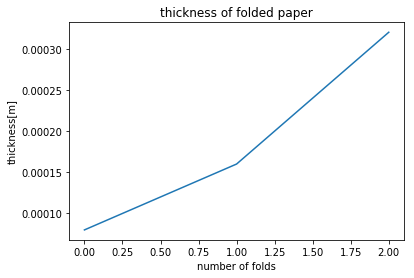

厚さ： 0.00032メートル
----------------------------------------------------------------------
3回目のグラフ


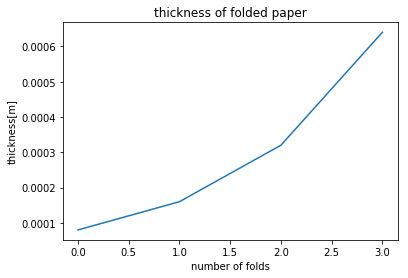

厚さ： 0.00064メートル
----------------------------------------------------------------------
4回目のグラフ


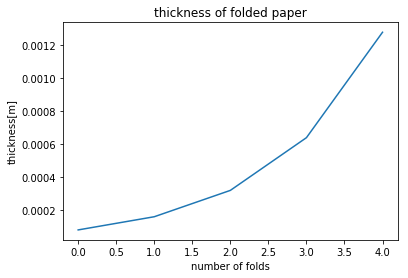

厚さ： 0.00128メートル
----------------------------------------------------------------------
5回目のグラフ


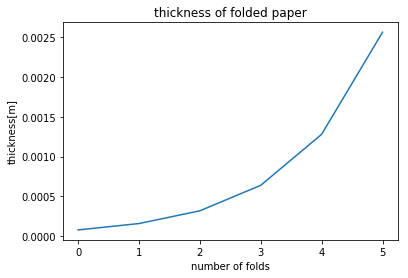

厚さ： 0.00256メートル
----------------------------------------------------------------------
6回目のグラフ


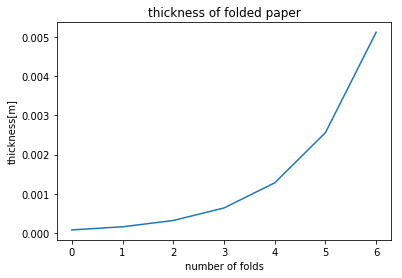

厚さ： 0.00512メートル
----------------------------------------------------------------------
7回目のグラフ


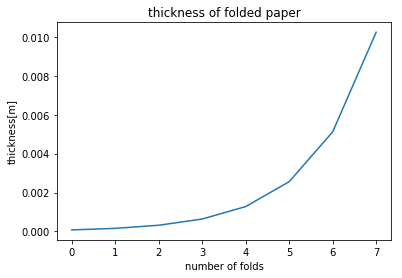

厚さ： 0.01024メートル
----------------------------------------------------------------------
8回目のグラフ


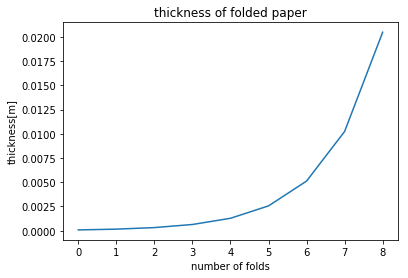

厚さ： 0.02048メートル
----------------------------------------------------------------------
9回目のグラフ


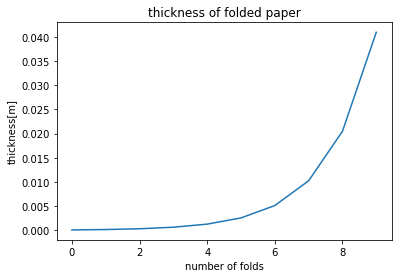

厚さ： 0.04096メートル
----------------------------------------------------------------------
10回目のグラフ


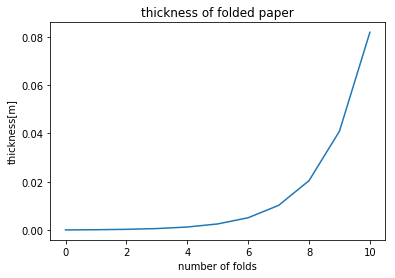

厚さ： 0.08192メートル
----------------------------------------------------------------------
11回目のグラフ


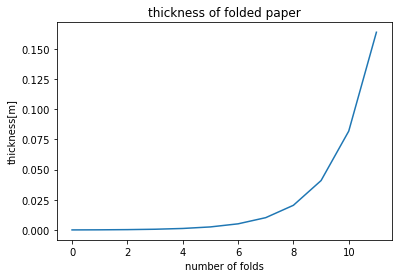

厚さ： 0.16384メートル
----------------------------------------------------------------------
12回目のグラフ


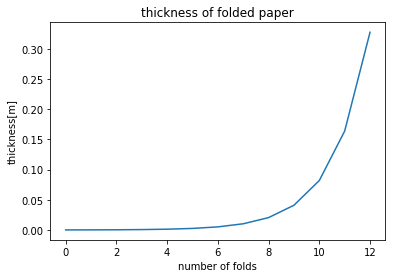

厚さ： 0.32768メートル
----------------------------------------------------------------------
13回目のグラフ


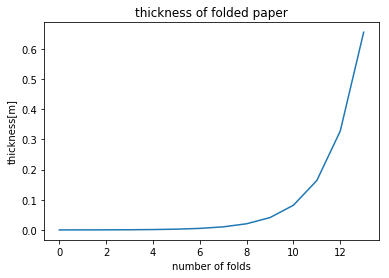

厚さ： 0.65536メートル
----------------------------------------------------------------------
14回目のグラフ


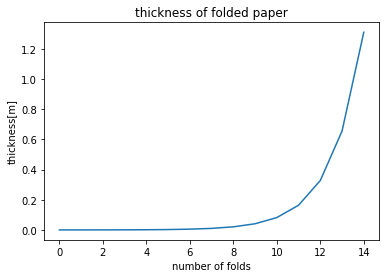

厚さ： 1.31072メートル
----------------------------------------------------------------------
15回目のグラフ


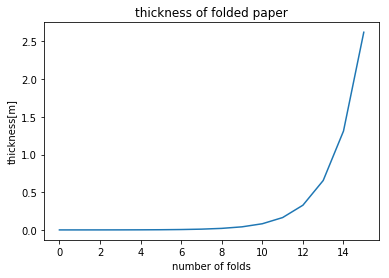

厚さ： 2.62144メートル
----------------------------------------------------------------------
16回目のグラフ


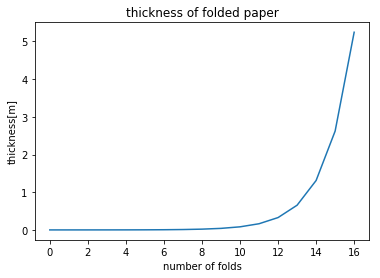

厚さ： 5.24288メートル
----------------------------------------------------------------------
17回目のグラフ


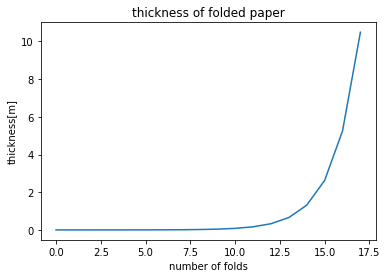

厚さ： 10.48576メートル
----------------------------------------------------------------------
18回目のグラフ


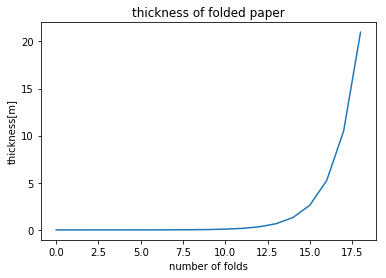

厚さ： 20.97152メートル
----------------------------------------------------------------------
19回目のグラフ


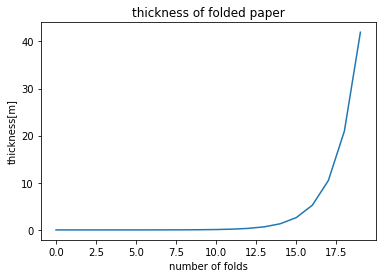

厚さ： 41.94304メートル
----------------------------------------------------------------------
20回目のグラフ


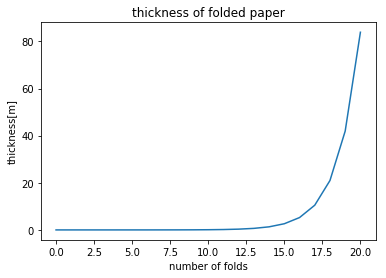

厚さ： 83.88608メートル
----------------------------------------------------------------------
21回目のグラフ


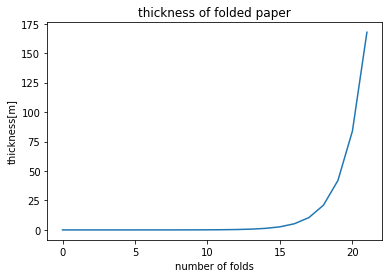

厚さ： 167.77216メートル
----------------------------------------------------------------------
22回目のグラフ


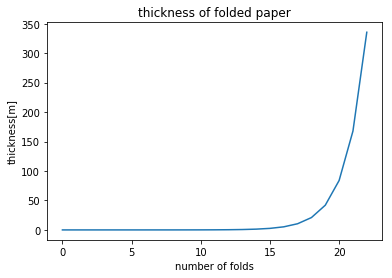

厚さ： 335.54432メートル
----------------------------------------------------------------------
23回目のグラフ


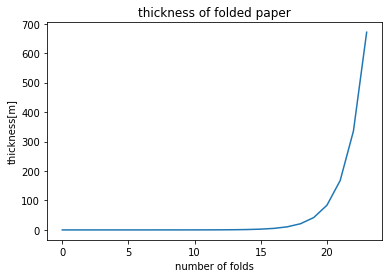

厚さ： 671.08864メートル
----------------------------------------------------------------------
24回目のグラフ


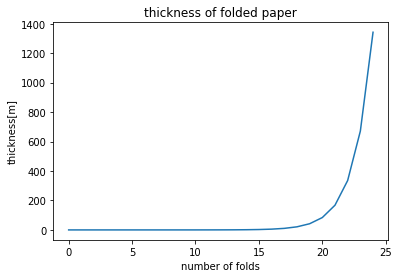

厚さ： 1342.17728メートル
----------------------------------------------------------------------
25回目のグラフ


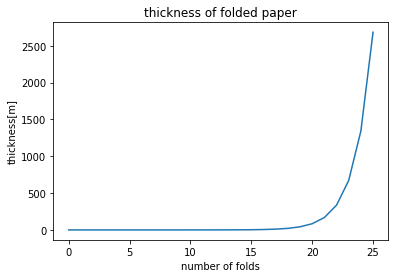

厚さ： 2684.35456メートル
----------------------------------------------------------------------
26回目のグラフ


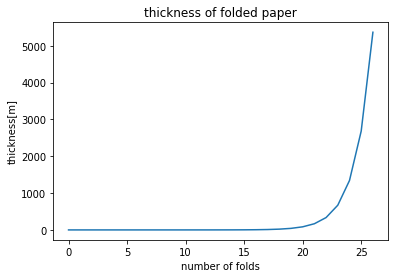

厚さ： 5368.70912メートル
----------------------------------------------------------------------
27回目のグラフ


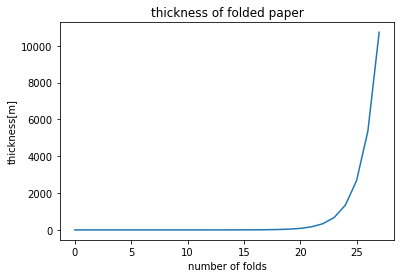

厚さ： 10737.41824メートル
----------------------------------------------------------------------
28回目のグラフ


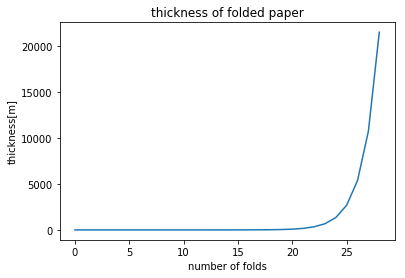

厚さ： 21474.83648メートル
----------------------------------------------------------------------
29回目のグラフ


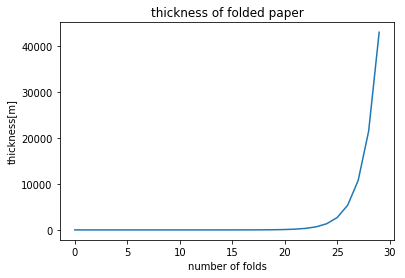

厚さ： 42949.67296メートル
----------------------------------------------------------------------
30回目のグラフ


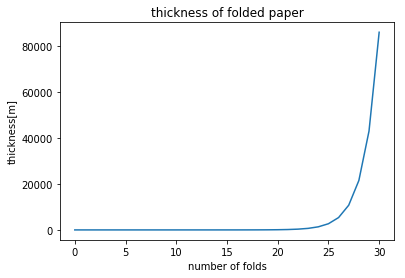

厚さ： 85899.34592メートル
----------------------------------------------------------------------
31回目のグラフ


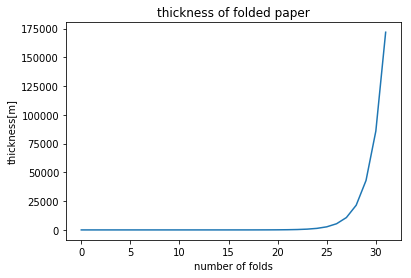

厚さ： 171798.69184メートル
----------------------------------------------------------------------
32回目のグラフ


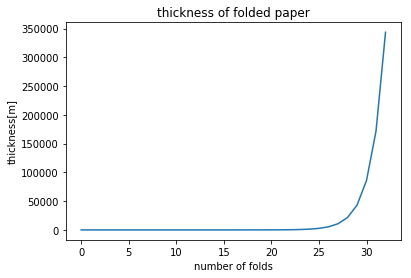

厚さ： 343597.38368メートル
----------------------------------------------------------------------
33回目のグラフ


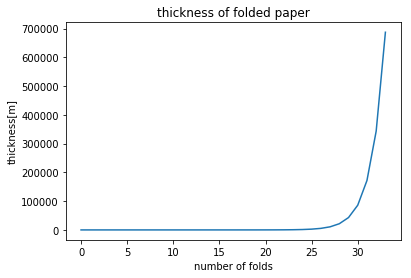

厚さ： 687194.76736メートル
----------------------------------------------------------------------
34回目のグラフ


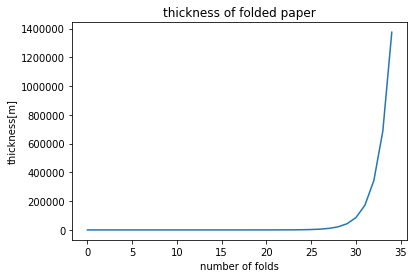

厚さ： 1374389.53472メートル
----------------------------------------------------------------------
35回目のグラフ


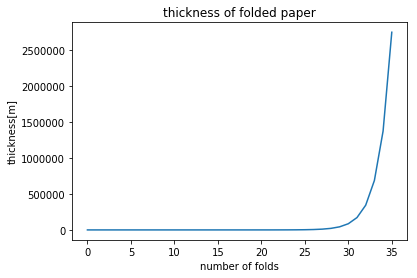

厚さ： 2748779.06944メートル
----------------------------------------------------------------------
36回目のグラフ


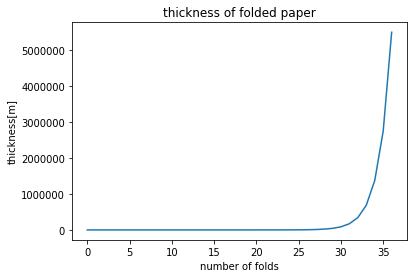

厚さ： 5497558.13888メートル
----------------------------------------------------------------------
37回目のグラフ


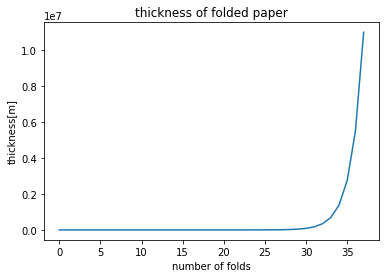

厚さ： 10995116.27776メートル
----------------------------------------------------------------------
38回目のグラフ


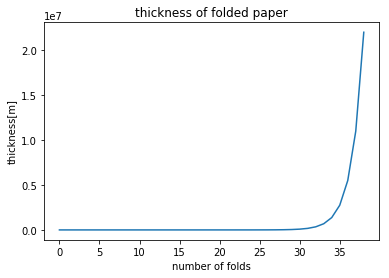

厚さ： 21990232.55552メートル
----------------------------------------------------------------------
39回目のグラフ


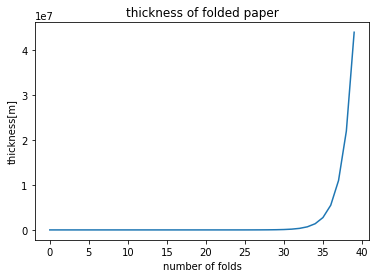

厚さ： 43980465.11104メートル
----------------------------------------------------------------------
40回目のグラフ


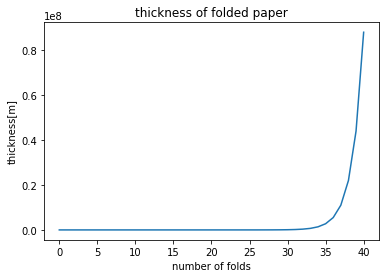

厚さ： 87960930.22208メートル
----------------------------------------------------------------------
41回目のグラフ


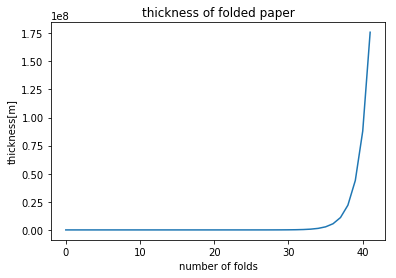

厚さ： 175921860.44416メートル
----------------------------------------------------------------------
42回目のグラフ


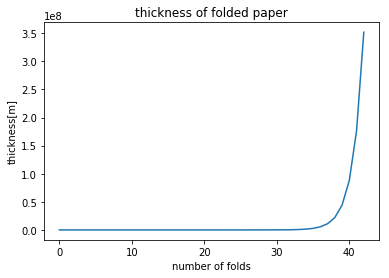

厚さ： 351843720.88832メートル
----------------------------------------------------------------------
43回目のグラフ


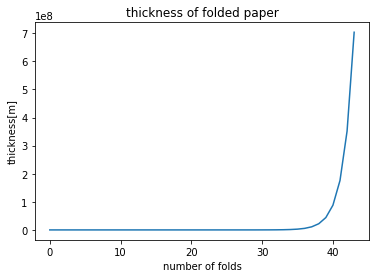

厚さ： 703687441.77664メートル
----------------------------------------------------------------------
最終結果のグラフ


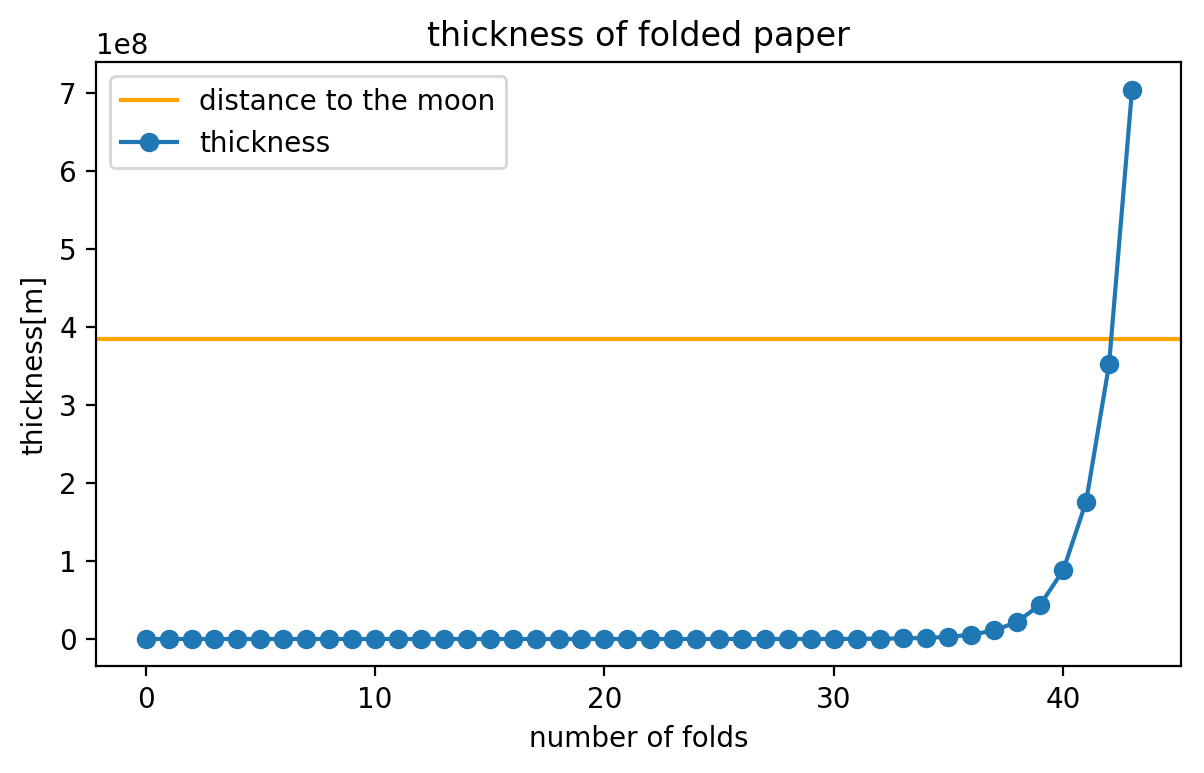

厚さ： 70.37万キロメートル


In [111]:
# べき乗の計算をループで実行
import time
start = time.time()

# グラフに出力するためのモジュールをインポート
import matplotlib.pyplot as plt
%matplotlib inline

thickness = 0.00008
fold_times = 43

y_list = []
y_list.append(0.00008)

n = 1
for i in range(fold_times):
    # n = n * 2
    n *= 2
    folded_thickness = thickness * n 
    y_list.append(folded_thickness)
    print(str(i + 1) + "回目のグラフ")
    plt.title("thickness of folded paper")
    plt.xlabel("number of folds")
    plt.ylabel("thickness[m]")
    plt.plot(y_list) 
    plt.show()
    print("厚さ： {}メートル".format(folded_thickness ))
    print("-" * 70)


print("最終結果のグラフ")
plt.figure(figsize=(7, 4), dpi=200)
plt.title("thickness of folded paper")
plt.xlabel("number of folds")
plt.ylabel("thickness[m]")
plt.axhline(y= 384400000 , xmin=0 , xmax=43, color="orange")
plt.plot(y_list,marker = "o") 
plt.legend(["distance to the moon","thickness"])
plt.show()

# メートルをキロメートルに変換して小数点以下2桁で表示する
print("厚さ： {:.2f}万キロメートル".format(folded_thickness /(1000*10000)))


 ### グラフの考察
回数を重ねるごとに、値が急激に増加する。グラフで見ると、傾きがX軸に対して垂直のようになっていく。

## 【問題7】グラフのカスタマイズ
グラフをより見やすくカスタマイズする。カスタマイズしたグラフを最低3種類作成する。

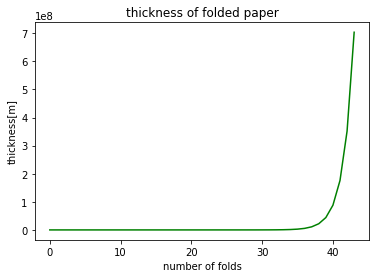

線を緑色にしたもの
----------------------------------------------------------------------------------------------------


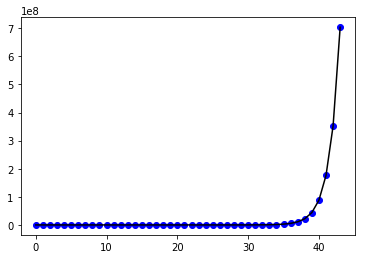

値を点で打ち、かつ、黒い線で表したもの
----------------------------------------------------------------------------------------------------


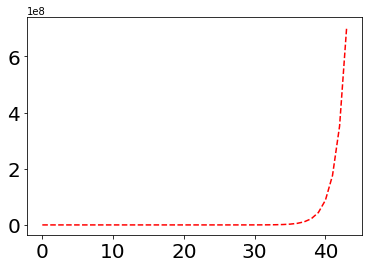

ラベルのフォントサイズを20にし、赤い点線で表したもの


In [203]:
# グラフに出力するためのモジュールをインポート
import matplotlib.pyplot as plt
%matplotlib inline

thickness = 0.00008
fold_times = 43

y_list = []
y_list.append(0.00008)

n = 1
for i in range(fold_times):
    # n = n * 2
    n *= 2
    folded_thickness = thickness * n 
    y_list.append(folded_thickness)

plt.title("thickness of folded paper")
plt.xlabel("number of folds")
plt.ylabel("thickness[m]")
plt.plot(y_list, color='green') # 「リスト名」のところにリストの変数名を入れる
plt.show()

print("線を緑色にしたもの")
print("-" * 100)

plt.plot(y_list, 'bo',y_list,'k')
plt.show()

print("値を点で打ち、かつ、黒い線で表したもの")
print("-" * 100)

plt.tick_params(labelsize=20) # 軸の値に関する設定を行う
plt.plot(y_list, 'r--') 
plt.show()
print("ラベルのフォントサイズを20にし、赤い点線で表したもの")

## 以下、おまけ

### 累乗計算高速化のアルゴリズムについて

累乗($ x^n $)の計算は、n回処理を行いオーダーはO(n)となる。n=43であれば、O(43)=43となる。  
指数nを２の累乗に分解することによって、O($ log_2n $)とすることが出来る。O($ log_243 $)≒5.43となる。  
指数nの分解について、漸化式は以下のようになる。
  
$$
    x^n =
        \begin{cases}
            (x^2)^{n/2} \quad n\%2  = 0 \\
            x*x^{n - 1} \quad n\%2 \neq  0 \\
        \end{cases}
$$

段階を踏んで、コードに落とし込む。
  
先ずは、一般的な累乗…

In [188]:
# buit-inの関数ではpow()
def my_pow(x, n):
    """
    O(n)
    """
    # 0乗は１になるため
    result = 1
    for i in range(n):
        result *= x
    return result

print("test:2^43={}".format(my_pow(2,43)))

test:2^43=8796093022208


ここまでは授業と同じ。  
これをfor文ではなく再帰で表現する。  

再帰の分岐は、以下の式で行けるはず。
  
$$
    x^n =
        \begin{cases}
            1 \quad n  = 0 \\
            x*x^{n - 1} \quad n \neq  0 \\
        \end{cases}
$$

In [187]:
def my_pow_r(x,n):
    """
    O(n)
    """
    if n == 0:
        return 1 # 終了:指数nが０である
    else:
        return x * my_pow_r(x, n -1) # 再帰：x * x^(n - 1)　→ x_1 * x_2 * x_3 * ... * x_n * 1
    
print("test:2^43={}".format(my_pow_r(2,43)))

test:2^43=8796093022208


分岐を以下に修正する。

$$
    x^n =
        \begin{cases}
            1 \quad n  = 0 \\
            (x^2)^{n/2} \quad n\%2  = 0 \\
            x*x^{n - 1} \quad n\%2 \neq  0 \\
        \end{cases}
$$

In [157]:
def my_pow_r_fix(x,n):
    '''
    O(log_2 n)
    '''
    
    if n == 0:
        return 1
    elif n % 2 == 0:
        return my_pow_r_fix(x ** 2, n/2) # (x**2)**(n/2)
    elif n % 2 != 0:
        return x*my_pow_r_fix(x, n-1) # x*(x**(n-1))
    
print("test:2^43={}".format(my_pow_r_fix(2,43)))

test:2^43=8796093022208


計算結果には間違いはないようなので、    
とりあえず、timeitで計算時間を計測してみる。

先ずは、べき乗演算子を用いた場合...

In [172]:
%timeit 2**43

100000000 loops, best of 5: 6.42 ns per loop


for文を用いた場合...

In [169]:
%timeit my_pow(2,43)

100000 loops, best of 5: 1.88 µs per loop


for文を再帰に置き換えた場合...

In [170]:
%timeit my_pow_r(2,43)

100000 loops, best of 5: 2.59 µs per loop


高速化するはずのアルゴリズムを用いた場合...

In [171]:
%timeit my_pow_r_fix(2,43)

100000 loops, best of 5: 2.73 µs per loop


私が計測した時の結果は、  
べき乗演算子を用いた場合...100000000 loops, best of 5: 6.42 ns per loop  
for文を用いた場合...100000 loops, best of 5: 1.88 µs per loop  
for文を再帰に置き換えた場合...100000 loops, best of 5: 2.59 µs per loop  
高速化するはずのアルゴリズムを用いた場合...100000 loops, best of 5: 2.73 µs per loop  
と、工夫すればするほど遅くなっている。  
  
for文より再帰関数の方が遅いのは、関数の呼び出しに時間が掛かっていると思われる。  
だとすれば、アルゴリズムを用いたことによる高速化より関数の呼び出しによる遅延の方が大きいようである。  
このアルゴリズムは指数が大きくなればなるほど効果が見込めるはずなので、指数を大きくして試してみる。  

べき乗演算子を用いた場合...

In [202]:
%timeit 2**1000

1000000 loops, best of 5: 614 ns per loop


for文を用いた場合...

In [201]:
%timeit my_pow(2,1000)

10000 loops, best of 5: 70.2 µs per loop


for文を再帰に置き換えた場合...

In [200]:
%timeit my_pow_r(2,1000)

10000 loops, best of 5: 163 µs per loop


高速化するはずのアルゴリズムを用いた場合...

In [199]:
%timeit my_pow_r_fix(2,1000)

100000 loops, best of 5: 5.68 µs per loop


私が計測した時の結果は、  
べき乗演算子を用いた場合...1000000 loops, best of 5: 616 ns per loop  
for文を用いた場合...10000 loops, best of 5: 68.1 µs per loop  
for文を再帰に置き換えた場合...10000 loops, best of 5: 163 µs per loop  
高速化するはずのアルゴリズムを用いた場合...100000 loops, best of 5: 5.35 µs per loop  
と、べき乗演算子が高速であるが、アルゴリズムを用いた成果も出てきた。
  
指数が1000の時の結果としては、大雑把に言うと、  
べき乗演算子を用いた方が、アルゴリズムを用いた場合の約10倍速い。  
アルゴリズムを用いた方が、for文を用いた場合の約10倍速い。  
for文を用いた方が、for文を単純に再帰に置き換えた場合の約25倍速い。  
  
べき乗演算子が高速なのは、高速に処理できる言語で書かれているためなのかよく分からない。  
アルゴリズムを用いないのであれば、for文を再帰に置き換えると遅くなる。  
  
timeitは処理をループさせて計算時間を計測するため、for文と再帰のメモリ使用量に大きな差が生じている可能性がある。
LineProfilerで単発の処理の場合の差を確認する。

In [182]:
from line_profiler import LineProfiler

def my_pow(x = 2, n = 1000):
    """
    O(n)
    """
    # 0乗は１になるため
    result = 1
    for i in range(n):
        result *= x
    return result

prof = LineProfiler()
prof.add_function(my_pow)
prof.runcall(my_pow)
prof.print_stats()

Timer unit: 1e-06 s

Total time: 0.000683 s
File: <ipython-input-182-a107e2462250>
Function: my_pow at line 4

Line #      Hits         Time  Per Hit   % Time  Line Contents
     4                                           def my_pow(x = 2, n = 1000):
     5                                               """
     6                                               O(n)
     7                                               """
     8                                               # 0乗は１になるため
     9         1          1.0      1.0      0.1      result = 1
    10      1001        305.0      0.3     44.7      for i in range(n):
    11      1000        376.0      0.4     55.1          result *= x
    12         1          1.0      1.0      0.1      return result



In [183]:
from line_profiler import LineProfiler

def my_pow_r(x = 2, n = 1000):
    """
    O(n)
    """
    if n == 0:
        return 1 # 終了:指数nが０である
    else:
        return x * my_pow_r(x, n -1) # 再帰：x * x^(n - 1)　→ x_1 * x_2 * x_3 * ... * x_n * 1

prof = LineProfiler()
prof.add_function(my_pow_r)
prof.runcall(my_pow_r)
prof.print_stats()

Timer unit: 1e-06 s

Total time: 0.000896 s
File: <ipython-input-183-f5442d732e37>
Function: my_pow_r at line 3

Line #      Hits         Time  Per Hit   % Time  Line Contents
     3                                           def my_pow_r(x = 2, n = 1000):
     4                                               """
     5                                               O(n)
     6                                               """
     7      1001        324.0      0.3     36.2      if n == 0:
     8         1          0.0      0.0      0.0          return 1 # 終了:指数nが０である
     9                                               else:
    10      1000        572.0      0.6     63.8          return x * my_pow_r(x, n -1) # 再帰：x * x^(n - 1)　→ x_1 * x_2 * x_3 * ... * x_n * 1



In [184]:
from line_profiler import LineProfiler

def my_pow_r_fix(x = 2,n = 1000):
    '''
    O(log_2 n)
    '''
    if n == 0:
        return 1
    elif n % 2 == 0:
        return my_pow_r_fix(x ** 2, n/2) # (x**2)**(n/2)
    elif n % 2 != 0:
        return x*my_pow_r_fix(x, n-1) # x*(x**(n-1))

prof = LineProfiler()
prof.add_function(my_pow_r_fix)
prof.runcall(my_pow_r_fix)
prof.print_stats()

Timer unit: 1e-06 s

Total time: 2.9e-05 s
File: <ipython-input-184-94921b0fc257>
Function: my_pow_r_fix at line 3

Line #      Hits         Time  Per Hit   % Time  Line Contents
     3                                           def my_pow_r_fix(x = 2,n = 1000):
     4                                               '''
     5                                               O(log_2 n)
     6                                               '''
     7        16          7.0      0.4     24.1      if n == 0:
     8         1          1.0      1.0      3.4          return 1
     9        15          7.0      0.5     24.1      elif n % 2 == 0:
    10         9         10.0      1.1     34.5          return my_pow_r_fix(x ** 2, n/2) # (x**2)**(n/2)
    11         6          3.0      0.5     10.3      elif n % 2 != 0:
    12         6          1.0      0.2      3.4          return x*my_pow_r_fix(x, n-1) # x*(x**(n-1))



私が計測した時の結果は、  
for文を用いた場合...Total time: 0.000683 s  
for文を再帰に置き換えた場合...Total time: 0.000896 s   
高速化するはずのアルゴリズムを用いた場合...Total time: 2.9e-05 s    
  
単発の処理については、
アルゴリズムを用いた方が、for文を用いた場合の約20倍速い。  
for文を用いた場合とfor文を単純に再帰に置き換えた場合とで、そこまで大きな差はない。  

以上の結果をふまえると、  
単純な累乗計算に関しては、べき乗演算子を用いると高速である。
何らかの理由でべき乗演算子を用いない場合は、
採用できるアルゴリズムがなければ、再帰よりfor文の方が高速になる。
今回は検証しなかったが、アルゴリズムを用いる場合でも再帰で実装するよりfor文で実装した方が高速になるかと思われる。